In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key2

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [9]:
# Use Openweather api to get the weather data needed from those cities.
url = "http://api.openweathermap.org/data/2.5/weather?"
temps = []
humid = []
clouds = []
winds = []
lats = []
lons = []
names = []

# Build query URL
for city in cities:
    query_url = url + "appid=" + api_key2 + "&q=" + city + "&units=imperial"
    response = requests.get(query_url)
    if response.status_code == 200:
        response = response.json()
        temps.append(response["main"]["temp"])
        humid.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        winds.append(response["wind"]["speed"])
        lats.append(response["coord"]["lat"])
        lons.append(response["coord"]["lon"])
        names.append(response["name"])

In [12]:

weather = pd.DataFrame({"City": names,
                        "Temperature (F)": temps,
                        "Humidity (%)": humid,
                        "Cloud Coverage (%)": clouds,
                        "Wind Speed (mph)": winds,
                        "Latitude": lats, 
                        "Longitude": lons
                       })
weather.head()

,City,Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),Latitude,Longitude
0,Karaton,77.00,88,40,5.82,-6.34,106.10
1,Pangnirtung,-31.57,0,0,4.29,66.15,-65.72
2,Pimenta Bueno,79.31,81,36,2.73,-11.68,-61.19
3,Mataura,67.61,96,100,19.06,-46.19,168.86
4,Yellowknife,-23.81,74,20,3.36,62.45,-114.38


In [13]:
len(weather)

552

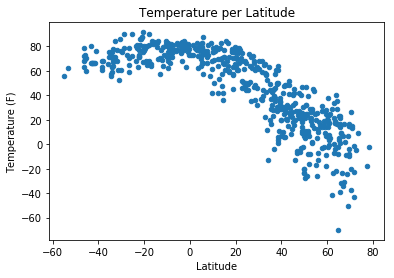

In [14]:
weather.plot.scatter(x="Latitude", y="Temperature (F)", title="Temperature per Latitude")
plt.savefig('Temp_perLat.png')

#Temperature does increase between -60 and 20 latitude.  

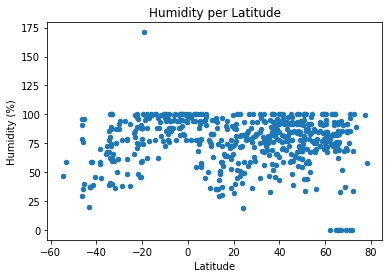

In [21]:
weather.plot.scatter(x="Latitude", y="Humidity (%)", title="Humidity per Latitude")
plt.show()

#Humidity again seems to trend higher north of 40 degrees latidute.  

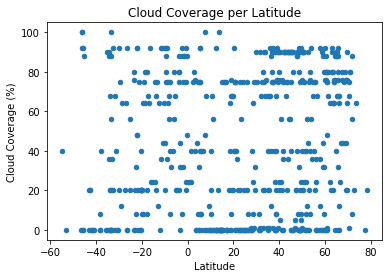

In [22]:
weather.plot.scatter(x="Latitude", y="Cloud Coverage (%)", title="Cloud Coverage per Latitude")
plt.show()

#Cloud coverage seems to trend stronger over 0 latitude.  

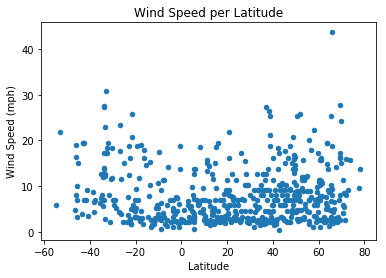

In [23]:
weather.plot.scatter(x="Latitude", y="Wind Speed (mph)", title="Wind Speed per Latitude")
plt.show()

#Wind speed above 10 doesn't seem to have a weighted distribution, between 0 and 10 it is heavier north of 0 degrees latitude. 